<a href="https://colab.research.google.com/github/SudheenaMisra/githubCE888/blob/main/Assignment2_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aif360[all]

In [2]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

For the Anlaysis I have collected data that describes the stop and search reported in North West England(streets: Cheshire, Cumbria, Greater Manchester, Lancashire and Mercyside) and merged all these streets data using command prompt.

In [3]:
#Stop and Search data reported in June 2018 of North West England
june_2018 = pd.read_csv("https://raw.githubusercontent.com/SudheenaMisra/Datasets/main/North%20West%20England/june_2018.csv")
#Stop and Search data reported in January 2019 of North West England
jan_2019 = pd.read_csv("https://raw.githubusercontent.com/SudheenaMisra/Datasets/main/North%20West%20England/jan2019.csv")
#Stop and Search data reported in November 2020 of North West England
nov_2020 = pd.read_csv("https://raw.githubusercontent.com/SudheenaMisra/Datasets/main/North%20West%20England/nov_2020.csv")


In [4]:
#Concatenating the all data together
data = pd.concat([june_2018,jan_2019,nov_2020])

## Priliminary data analysis

In [5]:
# Inspecting the overall information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 5655
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Type                                      11001 non-null  object
 1   Date                                      10998 non-null  object
 2   Part of a policing operation              1209 non-null   object
 3   Policing operation                        11 non-null     object
 4   Latitude                                  8828 non-null   object
 5   Longitude                                 8828 non-null   object
 6   Gender                                    10081 non-null  object
 7   Age range                                 10180 non-null  object
 8   Self-defined ethnicity                    10621 non-null  object
 9   Officer-defined ethnicity                 10140 non-null  object
 10  Legislation                               10717

In [6]:
#Summary Statistics
data.describe()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
count,11001,10998,1209,11,8828,8828,10081,10180,10621,10140,10717,6781,10888,1914,9047
unique,5,10383,3,1,4043,4062,4,6,19,5,7,12,8,3,3
top,Person search,2019-01-12T19:15:00+00:00,False,Policing operation,53.407939,-2.977364,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False
freq,8166,20,1103,11,74,74,9225,3439,8128,9102,7747,4017,8346,1392,8698


In [7]:
#Inspecting last few rows 
data.tail()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
5651,Person search,2020-11-30T23:53:08+00:00,NaN,NaN,53.421185,-2.947753,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,NaN,False
5652,Person search,2020-11-30T23:54:29+00:00,NaN,NaN,53.424261,-2.834218,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,NaN,A no further action disposal,NaN,NaN
5653,Person search,2020-11-30T23:55:23+00:00,NaN,NaN,53.438232,-2.871629,Male,25-34,Other ethnic group - Not stated,NaN,NaN,NaN,A no further action disposal,NaN,False
5654,Person search,2020-11-30T23:58:14+00:00,NaN,NaN,53.421185,-2.947753,Male,18-24,White - Irish,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,NaN,False
5655,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#removing last row as it contain almost all Null values
data.drop(data.tail(n=1).index,inplace = True)
#getting column names
data.columns

Index(['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Latitude', 'Longitude', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing'],
      dtype='object')

In [9]:
#subsetting relevent columns for analysis
data_subset = data[['Type','Gender', 'Age range','Officer-defined ethnicity',
       'Object of search', 'Outcome']]
data_subset.tail()

,Type,Gender,Age range,Officer-defined ethnicity,Object of search,Outcome
5650,Person search,Female,25-34,White,NaN,A no further action disposal
5651,Person search,Male,18-24,White,NaN,A no further action disposal
5652,Person search,Male,10-17,White,NaN,A no further action disposal
5653,Person search,Male,25-34,NaN,NaN,A no further action disposal
5654,Person search,Male,18-24,White,NaN,A no further action disposal


In [10]:
#Changing the column name
data_subset = data_subset.rename(columns = {'Officer-defined ethnicity':"Ethnicity"})
data_subset.columns

Index(['Type', 'Gender', 'Age range', 'Ethnicity', 'Object of search',
       'Outcome'],
      dtype='object')

In [11]:
#Printing the category count in each column
for i in data_subset.columns:
    print(data_subset[i].value_counts())

Person search                8166
Person and Vehicle search    2472
Vehicle search                349
Type                           11
                               2
Name: Type, dtype: int64
Male      9225
Female     842
Gender      11
Other        3
Name: Gender, dtype: int64
18-24        3439
over 34      2489
25-34        2443
10-17        1792
Age range      11
under 10        6
Name: Age range, dtype: int64
White                        9102
Asian                         475
Black                         444
Other                         108
Officer-defined ethnicity      11
Name: Ethnicity, dtype: int64
Controlled drugs                       4017
Articles for use in criminal damage     812
Article for use in theft                734
Offensive weapons                       567
Stolen goods                            286
Fireworks                               249
Firearms                                 55
Evidence of offences under the Act       24
Anything to threaten or harm

In [12]:
#Printing the count of missing values in each column
data_subset.isnull().sum()

Type                   0
Gender               919
Age range            820
Ethnicity            860
Object of search    4219
Outcome              112
dtype: int64

## Handling missing values

In [13]:
#Imputing missing value of each column with most frequent category.
#While analysing the data it has been noticed that the header names are present in some of the rows so first replacing those irrelevant categories to Nan and then fill with most frequent category.
data_subset['Type'] = data_subset['Type'].replace("Type" and "", np.NaN)
data_subset['Type']=data_subset['Type'].fillna("Person search")
print(data_subset['Type'].unique())

data_subset["Gender"] = data_subset["Gender"].replace("Gender" or "Other", np.NaN)
data_subset["Gender"] = data_subset["Gender"].fillna("Male")
print(data_subset["Gender"].unique() )

data_subset["Age range"] = data_subset["Age range"].replace("Age range", np.NaN)
data_subset["Age range"] = data_subset["Age range"].fillna("18-24")
print(data_subset["Age range"].unique() )

data_subset['Ethnicity'] = data_subset['Ethnicity'].replace("Officer-defined ethnicity" or "Other", np.NaN)
data_subset['Ethnicity'] = data_subset['Ethnicity'].fillna("White")
print(data_subset['Ethnicity'].unique())

data_subset['Object of search'] = data_subset['Object of search'].replace('Object of search', np.NaN)
data_subset['Object of search'] = data_subset['Object of search'].fillna('Controlled drugs')
print(data_subset['Object of search'].unique())

data_subset['Outcome'] = data_subset['Outcome'].replace('Outcome', np.NaN)
data_subset['Outcome'] = data_subset['Outcome'].fillna('A no further action disposal')
print(data_subset['Outcome'].unique())



['Person search' 'Person and Vehicle search' 'Type' 'Vehicle search']
['Male' 'Female' 'Other']
['25-34' '18-24' 'over 34' '10-17' 'under 10']
['White' 'Black' 'Asian' 'Other']
['Controlled drugs' 'Stolen goods' 'Article for use in theft'
 'Offensive weapons' 'Firearms' 'Articles for use in criminal damage'
 'Anything to threaten or harm anyone'
 'Evidence of offences under the Act' 'Fireworks' 'Crossbows'
 'Game or poaching equipment']
['A no further action disposal' 'Summons / charged by post'
 'Khat or Cannabis warning' 'Arrest' 'Community resolution'
 'Caution (simple or conditional)' 'Penalty Notice for Disorder']


In [14]:
#checking the null values again 
data_subset.isnull().sum()

Type                0
Gender              0
Age range           0
Ethnicity           0
Object of search    0
Outcome             0
dtype: int64

In [15]:
#printing the summary of Gender column
data_subset["Gender"].value_counts()

Male      10155
Female      842
Other         3
Name: Gender, dtype: int64

In [16]:
#Calculating percentage
print("percentage of Men:", round(10158/11000*100, ndigits=2), "%")
print("percentage of Women", round(842/11000*100, ndigits=2), "%")

percentage of Men: 92.35 %
percentage of Women 7.65 %


In [17]:
data_subset['Ethnicity'].value_counts()

White    9973
Asian     475
Black     444
Other     108
Name: Ethnicity, dtype: int64

In [18]:
print("percentage of White:", round(10081/11000*100, ndigits=2), "%")
print("percentage of Asian:", round(475/11000*100, ndigits=2), "%")
print("percentage of Black:", round(444/11000*100, ndigits=2), "%")

percentage of White: 91.65 %
percentage of Asian: 4.32 %
percentage of Black: 4.04 %


# Data Visualization

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Bar plot showing stop and search based on age')

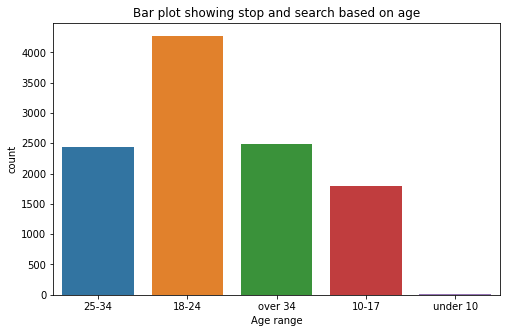

In [40]:

plt.figure(figsize= (8,5))
#plot showing the gender wise count of victims
sns.countplot(x="Age range",data=data_subset)
plt.title("Bar plot showing stop and search based on age")
plt.savefig("age.pdf", dpi=2000)

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Bar plot showing stop and search based on Gender')

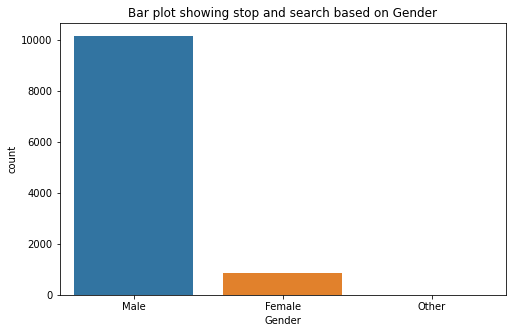

In [41]:

plt.figure(figsize= (8,5))
#plot showing the gender wise count of victims
sns.countplot(x="Gender",data=data_subset)
plt.title("Bar plot showing stop and search based on Gender")
plt.savefig("gender.pdf", dpi=2000)

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'Bar plot showing the count of object of search in North West England')

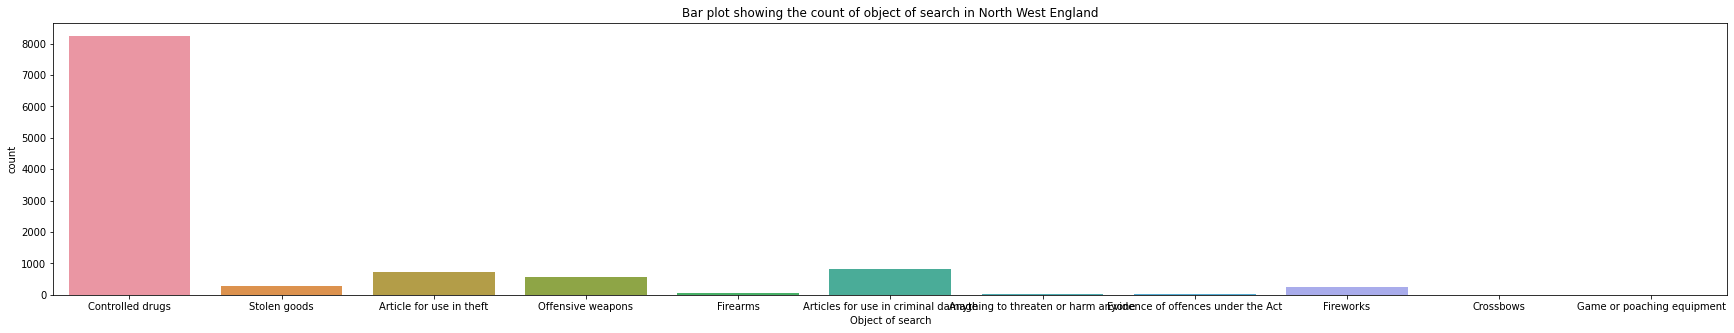

In [42]:

plt.figure(figsize= (30,5))
#plot showing the gender wise count of victims
sns.countplot(x="Object of search",data=data_subset)
plt.title("Bar plot showing the count of object of search in North West England")
plt.savefig("object.pdf", dpi=2000)

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Bar plot showing stop and search based on Ethinicity')

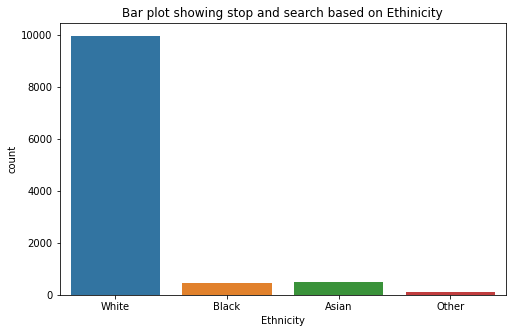

In [43]:

plt.figure(figsize= (8,5))
#plot showing the gender wise count of victims
sns.countplot(x="Ethnicity",data=data_subset)
plt.title("Bar plot showing stop and search based on Ethinicity")
plt.savefig("ethnicity.pdf", dpi=2000)

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'Bar plot showing the outcome of stop and search reported in North West England')

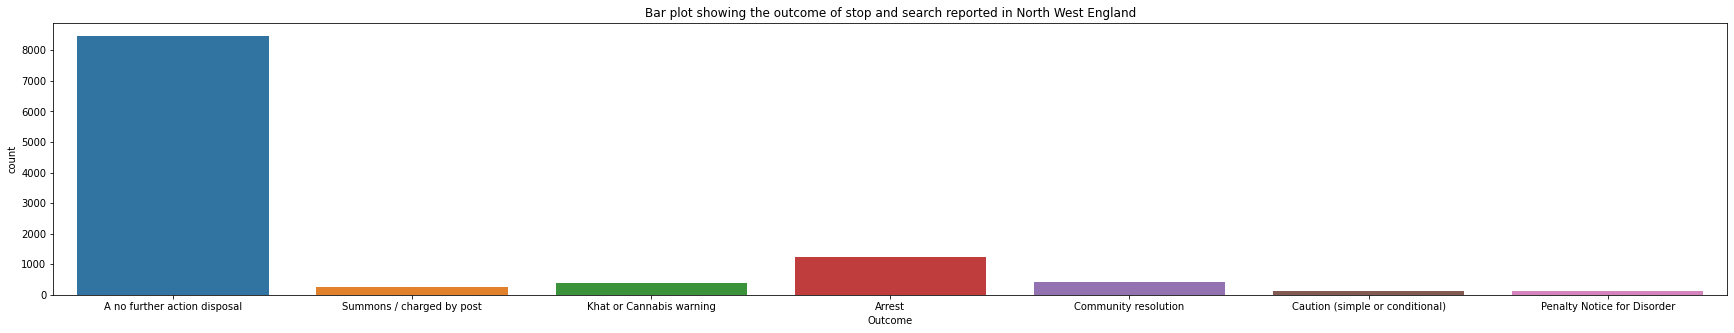

In [44]:
plt.figure(figsize= (30,5))
#plot showing the gender wise count of victims
sns.countplot(x="Outcome",data=data_subset)
plt.title("Bar plot showing the outcome of stop and search reported in North West England")
plt.savefig("outcome.pdf", dpi=2000)

## Preprocessing the data (part i)
The missing values are now successfully handled.

There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:

#### 1.Convert the non-numeric data into numeric.
#### 2.Split the data into train and test sets.
#### 3.Scale the feature values to a uniform range.
First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called label encoding.

In [60]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in data_subset.columns.to_numpy():
    # Compare if the dtype is object
    if data_subset[col].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        data_subset[col]=le.fit_transform(data_subset[col])

In [61]:
data_subset.dtypes

Type                int64
Gender              int64
Age range           int64
Ethnicity           int64
Object of search    int64
Outcome             int64
dtype: object

In [62]:
print(data_subset.head())
print(data_subset.shape)

   Type  Gender  Age range  Ethnicity  Object of search  Outcome
0     1       1          2          3                 3        0
1     1       1          1          3                 3        0
2     1       0          2          3                10        0
3     1       1          2          3                 3        6
4     1       1          1          3                 3        4
(11000, 6)


### Splitting the dataset into train and test sets.

We have successfully converted all the non-numeric values to numeric ones.Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.

In [63]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# convert the DataFrame to a NumPy array
#data_subset = data_subset.drop("Date")
data_subset = data_subset.to_numpy()


# Segregate features and labels into separate variables
x,y = data_subset[:,0:5] , data_subset[:,5]

# Split into train and test sets
x_train, X_test, y_train, Y_test = train_test_split(x,y,test_size=0.33, random_state=42)
                                

The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data.

In [64]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.transform(X_test)

### Fitting a logistic regression model to the train set

In [65]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Making predictions and evaluating performance
But how well does our model perform?

We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model's confusion matrix. The confusion matrix helps us to view our model's performance.

In [66]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,Y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(Y_test,y_pred)

Accuracy of logistic regression classifier:  0.7721763085399449


array([[2803,    0,    0,    0,    0,    0,    0],
       [ 402,    0,    0,    0,    0,    0,    0],
       [  38,    0,    0,    0,    0,    0,    0],
       [ 130,    0,    0,    0,    0,    0,    0],
       [ 114,    0,    0,    0,    0,    0,    0],
       [  36,    0,    0,    0,    0,    0,    0],
       [ 107,    0,    0,    0,    0,    0,    0]])

### Grid searching and making the model perform better
Our model was able to yield an accuracy score of almost 77%.
For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances predicted 
by the model correctly.Let's see if we can do better. We can perform a grid search of the model parameters to improve the model's ability to predict the bias.
scikit-learn's implementation of logistic regression consists of different hyperparameters but we will grid search over the following two: tol and max_iter

In [67]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

### Finding the best performing model
We have defined the grid of hyperparameter values and converted them into a single dictionary format which GridSearchCV() expects as one of its parameters. Now, we will begin the grid search to see which values perform best.We will instantiate GridSearchCV() with our earlier logreg model with all the data we have. Instead of passing train and test sets separately, we will supply X (scaled version) and y. We will also instruct GridSearchCV() to perform a cross-validation of five folds.


In [68]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(x)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best: 0.769909 using {'max_iter': 100, 'tol': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
